In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.core import datetools

W:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


In [2]:
# Define working dir
os.chdir('F:\BD8')
# os.chdir('C:/Users/guild/Documents/crypto_exploration_py')

In [3]:
# Import dataset
prices = pd.read_csv('prices2.csv')

In [4]:
# Parse timestamps
prices['datetime'] = pd.to_datetime(prices['datetime'], unit='ms')

In [5]:
# Make em index
prices = prices.set_index('datetime')

___
<font size="5">The Data:</font>

In [6]:
prices.shape

(124064, 69)

In [7]:
# Descriptive statistics summary
prices.describe()

,BTCUSDT,XRPBTC,ETHBTC,EOSBTC,LTCBTC,TRXBTC,XLMBTC,XMRBTC,NEOBTC,XEMBTC,...,GASBTC,MITHBTC,NXSBTC,KNCBTC,CMTBTC,STORJBTC,SALTBTC,SUBBTC,BRDBTC,CVCBTC
count,124064.000000,124064.000000,124064.000000,124064.000000,124064.000000,1.240640e+05,1.240640e+05,124064.000000,124064.000000,1.240640e+05,...,124064.000000,1.240640e+05,124064.000000,124064.000000,1.240640e+05,124064.000000,124064.000000,124064.000000,1.240640e+05,1.240640e+05
mean,3546.094176,0.000085,0.032298,0.000734,0.010987,7.140600e-06,2.192456e-05,0.012913,0.002121,1.093164e-05,...,0.000568,1.029350e-05,0.000083,0.000036,6.732466e-06,0.000040,0.000058,0.000012,5.432725e-05,1.397657e-05
std,95.043569,0.000002,0.001285,0.000042,0.001071,4.362253e-07,7.601315e-07,0.000407,0.000098,4.591902e-07,...,0.000018,6.171784e-07,0.000003,0.000002,2.371170e-07,0.000003,0.000003,0.000001,5.485122e-07,5.307526e-07
min,3379.390000,0.000083,0.029869,0.000670,0.009475,6.440000e-06,2.073000e-05,0.011993,0.001979,9.980000e-06,...,0.000537,9.440000e-06,0.000074,0.000033,6.360000e-06,0.000037,0.000048,0.000006,5.301000e-05,1.298000e-05
25%,3459.070000,0.000084,0.031032,0.000690,0.009789,6.690000e-06,2.131000e-05,0.012481,0.002036,1.059000e-05,...,0.000555,9.800000e-06,0.000081,0.000034,6.500000e-06,0.000038,0.000058,0.000012,5.395000e-05,1.366000e-05
50%,3601.530000,0.000085,0.032490,0.000744,0.011528,7.270000e-06,2.177000e-05,0.013032,0.002081,1.092000e-05,...,0.000564,1.021000e-05,0.000082,0.000035,6.660000e-06,0.000039,0.000059,0.000012,5.422000e-05,1.390000e-05
75%,3629.150000,0.000086,0.033665,0.000768,0.011965,7.540000e-06,2.224000e-05,0.013188,0.002218,1.126000e-05,...,0.000583,1.055000e-05,0.000084,0.000036,6.940000e-06,0.000040,0.000060,0.000012,5.471000e-05,1.437000e-05
max,3728.880000,0.000089,0.034461,0.000821,0.012981,8.390000e-06,2.381000e-05,0.013990,0.002333,1.263000e-05,...,0.000678,1.310000e-05,0.000092,0.000045,7.400000e-06,0.000071,0.000063,0.000013,5.896000e-05,1.768000e-05


In [8]:
prices.info(max_cols=10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124064 entries, 2019-02-02 11:13:04.696000 to 2019-02-16 19:51:45.949000
Columns: 69 entries, BTCUSDT to CVCBTC
dtypes: float64(69)
memory usage: 66.3 MB


In [9]:
prices.head()

,BTCUSDT,XRPBTC,ETHBTC,EOSBTC,LTCBTC,TRXBTC,XLMBTC,XMRBTC,NEOBTC,XEMBTC,...,GASBTC,MITHBTC,NXSBTC,KNCBTC,CMTBTC,STORJBTC,SALTBTC,SUBBTC,BRDBTC,CVCBTC
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-02 11:13:04.696,3464.38,0.000089,0.031015,0.000675,0.009581,0.000007,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:14.695,3464.40,0.000089,0.031016,0.000675,0.009582,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:24.696,3465.65,0.000089,0.031015,0.000675,0.009583,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:34.697,3465.67,0.000089,0.031016,0.000675,0.009581,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:44.699,3465.67,0.000089,0.031016,0.000675,0.009581,0.000008,0.000024,0.012499,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014


___
Check for missing values or zeros

In [10]:
# assert that there are no missing values
print(prices.isnull().values.any().any())

# assert that there are no zeros
print(0 in prices.values)

False
False




_____________________________________________
<font size="5">Resampling to hourly:</font>

In [11]:
hourly = prices.resample('H')
hourly_ohlc = hourly.ohlc()

In [12]:
hourly_ohlc.head()

BTCUSDT                               XRPBTC            \
                        open     high      low    close      open      high   
datetime                                                                      
2019-02-02 11:00:00  3464.38  3481.14  3464.38  3477.83  0.000089  0.000089   
2019-02-02 12:00:00  3477.45  3477.95  3468.50  3469.33  0.000089  0.000089   
2019-02-02 13:00:00  3468.59  3474.14  3464.22  3465.02  0.000089  0.000089   
2019-02-02 14:00:00  3465.06  3469.12  3457.19  3466.77  0.000089  0.000089   
2019-02-02 15:00:00  3465.21  3467.79  3453.39  3456.81  0.000088  0.000089   

                                           ETHBTC              ...     \
                          low     close      open      high    ...      
datetime                                                       ...      
2019-02-02 11:00:00  0.000089  0.000089  0.031015  0.031130    ...      
2019-02-02 12:00:00  0.000089  0.000089  0.031030  0.031064    ...      
2019-02-02 13:00:00  0.000089  0.000089  0.031049  0.031115    ...      
2019-02-02 14:00:00  0.000088  0.000088  0.031059  0.031109    ...      
2019-02-02 15:00:00  0.000088  0.000089  0.031083  0.031155    ...      

                       SUBBTC              BRDBTC                      \
                          low     close      open      high       low   
datetime                                                                
2019-02-02 11:00:00  0.000013  0.000013  0.000055  0.000055  0.000055   
2019-02-02 12:00:00  0.000013  0.000013  0.000055  0.000055  0.000054   
2019-02-02 13:00:00  0.000013  0.000013  0.000055  0.000055  0.000054   
2019-02-02 14:00:00  0.000013  0.000013  0.000054  0.000054  0.000054   
2019-02-02 15:00:00  0.000012  0.000012  0.000054  0.000054  0.000054   

                                 CVCBTC                                
                        close      open      high       low     close  
datetime                                                               
2019-02-02 11:00:00  0.000055  0.000014  0.000014  0.000014  0.000014  
2019-02-02 12:00:00  0.000055  0.000014  0.000014  0.000014  0.000014  
2019-02-02 13:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  
2019-02-02 14:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  
2019-02-02 15:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  

[5 rows x 276 columns]

___
<font size="4">Open, High, Low and Close of days:</font><br>

In [13]:
daily = prices.resample('D')
daily_ohlc = daily.ohlc()

In [14]:
daily_ohlc.head()

BTCUSDT                               XRPBTC                      \
               open     high      low    close      open      high       low   
datetime                                                                       
2019-02-02  3464.38  3520.03  3447.45  3503.81  0.000089  0.000089  0.000088   
2019-02-03  3504.05  3510.63  3426.34  3458.09  0.000089  0.000089  0.000087   
2019-02-04  3458.11  3483.38  3433.38  3463.30  0.000087  0.000088  0.000086   
2019-02-05  3463.22  3478.95  3448.64  3468.49  0.000086  0.000087  0.000086   
2019-02-06  3468.02  3482.67  3383.87  3405.79  0.000086  0.000086  0.000085   

                        ETHBTC              ...       SUBBTC            \
               close      open      high    ...          low     close   
datetime                                    ...                          
2019-02-02  0.000089  0.031015  0.031588    ...     0.000012  0.000012   
2019-02-03  0.000087  0.031521  0.031652    ...     0.000012  0.000012   
2019-02-04  0.000086  0.031035  0.031363    ...     0.000012  0.000012   
2019-02-05  0.000086  0.031078  0.031150    ...     0.000012  0.000012   
2019-02-06  0.000085  0.030905  0.031006    ...     0.000011  0.000012   

              BRDBTC                                  CVCBTC            \
                open      high       low     close      open      high   
datetime                                                                 
2019-02-02  0.000055  0.000056  0.000054  0.000055  0.000014  0.000014   
2019-02-03  0.000055  0.000059  0.000054  0.000054  0.000014  0.000014   
2019-02-04  0.000054  0.000057  0.000054  0.000055  0.000014  0.000014   
2019-02-05  0.000055  0.000056  0.000053  0.000055  0.000014  0.000014   
2019-02-06  0.000055  0.000055  0.000053  0.000054  0.000013  0.000013   

                                
                 low     close  
datetime                        
2019-02-02  0.000014  0.000014  
2019-02-03  0.000014  0.000014  
2019-02-04  0.000014  0.000014  
2019-02-05  0.000013  0.000013  
2019-02-06  0.000013  0.000013  

[5 rows x 276 columns]

___
<font size="4">Bitcoin gains for the day:</font><br>

In [15]:
# Nice format
round(((daily_ohlc.BTCUSDT.open - daily_ohlc.BTCUSDT.close) / daily_ohlc.BTCUSDT.open * 100) , 1).astype(str) + ' %'

datetime
2019-02-02    -1.1 %
2019-02-03     1.3 %
2019-02-04    -0.2 %
2019-02-05    -0.2 %
2019-02-06     1.8 %
2019-02-07     0.3 %
2019-02-08    -7.7 %
2019-02-09    -0.2 %
2019-02-10    -0.4 %
2019-02-11     1.3 %
2019-02-12    -0.0 %
2019-02-13     0.6 %
2019-02-14     0.5 %
2019-02-15    -0.3 %
2019-02-16    -0.9 %
Freq: D, dtype: object

___
<font size="4">The gains of the day for each coins:</font><br>
As log returns

In [16]:
close = daily_ohlc.loc[:, (slice(None), 'close')]
daily_returns = np.log(close.pct_change()+1)

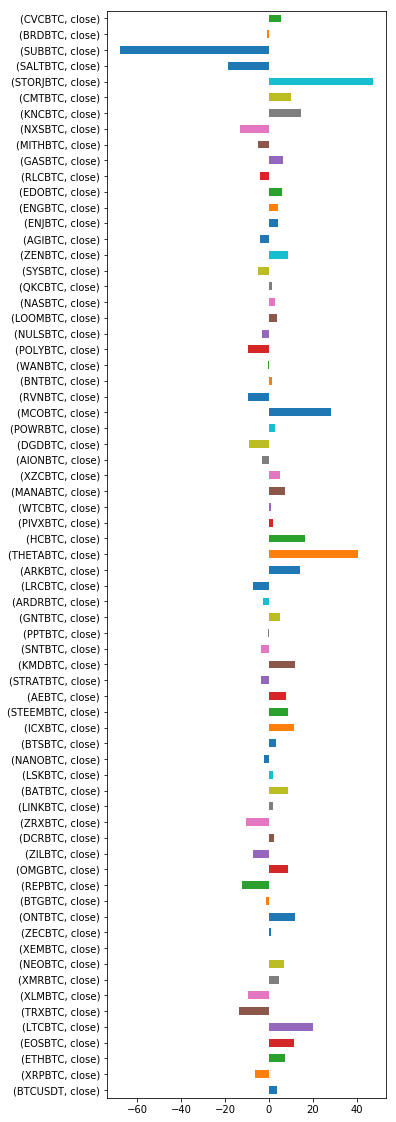

In [17]:
# for the week
(daily_returns*100).sum().plot.barh(figsize=[5, 20])

The abherrantly low return value, in the orders of a crash, for SUBBTC (Substratum), coincides with the Binance's announcement regarding its imminent delisting from the exchange. 

The market reacted very strongly to this new and sold it in mass:

In [18]:
# Downsample to hourly
hourly_close = hourly_ohlc.loc[:, (slice(None), 'close')]
hourly_close.columns = prices.columns.get_level_values(0) # Remove useless 'close' cols by renaming

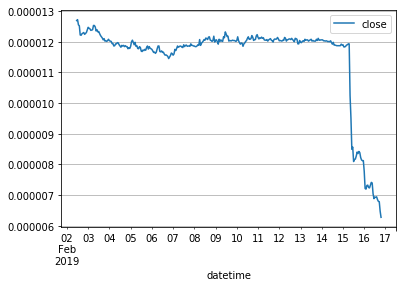

In [19]:
x = pd.DataFrame(hourly_ohlc['SUBBTC']['close'].copy())
x.plot(grid=True)

___

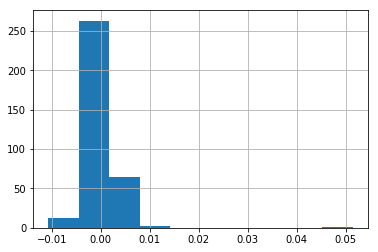

In [20]:
# Distribution of hourly log returns for Bitcoin.
# Get percent change
hourly_pct_change = np.log(hourly_close.pct_change()+1)

hourly_pct_change['BTCUSDT'].hist()
plt.show()

In [21]:
# Meanwhile, Hourly returns are skewed towards losses for Bitcoin too for this dataset.

___
<font size="4">Some correlation analysis</font><br>

In [22]:
corr = hourly_close.corr()
corr.style.background_gradient().set_precision(2)

In [23]:
# Sorted in order of Bitcoin correlation
corr_sorted = corr.sort_values('BTCUSDT', ascending=False).index
corr_sorted

Index(['BTCUSDT', 'LTCBTC', 'BNTBTC', 'HCBTC', 'EOSBTC', 'ETHBTC', 'ARKBTC',
       'XMRBTC', 'ENGBTC', 'ZENBTC', 'NEOBTC', 'CMTBTC', 'PIVXBTC', 'THETABTC',
       'CVCBTC', 'GASBTC', 'ICXBTC', 'KNCBTC', 'XZCBTC', 'OMGBTC', 'EDOBTC',
       'LINKBTC', 'ENJBTC', 'ONTBTC', 'BATBTC', 'BTSBTC', 'BTGBTC', 'KMDBTC',
       'DCRBTC', 'WTCBTC', 'MCOBTC', 'AIONBTC', 'ZECBTC', 'AEBTC', 'AGIBTC',
       'NASBTC', 'GNTBTC', 'LSKBTC', 'XEMBTC', 'BRDBTC', 'NANOBTC', 'STRATBTC',
       'STEEMBTC', 'MITHBTC', 'STORJBTC', 'POWRBTC', 'PPTBTC', 'WANBTC',
       'MANABTC', 'DGDBTC', 'ARDRBTC', 'NULSBTC', 'RVNBTC', 'RLCBTC', 'SUBBTC',
       'NXSBTC', 'QKCBTC', 'SNTBTC', 'SALTBTC', 'ZRXBTC', 'POLYBTC', 'XLMBTC',
       'LRCBTC', 'LOOMBTC', 'SYSBTC', 'REPBTC', 'ZILBTC', 'XRPBTC', 'TRXBTC'],
      dtype='object')

In [24]:
# In average, most coins are slighly correlated with Bitcoin:
corr['BTCUSDT'].mean()

0.21423047419538102

In [25]:
# As such, all Pairs are a slightly correlated with LTC too.
corr['LTCBTC'].mean()

0.1980338555818033

In [26]:
# And the same logic applies to TRX, in an expectedly inverse manner.
corr['TRXBTC'].mean()

-0.20275019740269168

<br>
<font size="4">Bitcoin chart for comparison (with moving averages)</font><br>

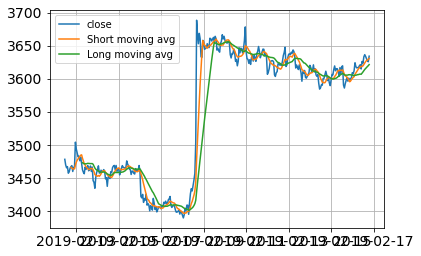

In [27]:
y1 = hourly_ohlc['BTCUSDT']['close']
y2 = hourly_ohlc['BTCUSDT']['close'].rolling(window=8).mean()
y3 = hourly_ohlc['BTCUSDT']['close'].rolling(window=21).mean()

plt.plot(hourly_ohlc.index.values, y1, y2)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(y3)
plt.legend(['close', 'Short moving avg', 'Long moving avg'])
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

<br>
<font size="4">Most correlated coin : Litecoin</font><br>

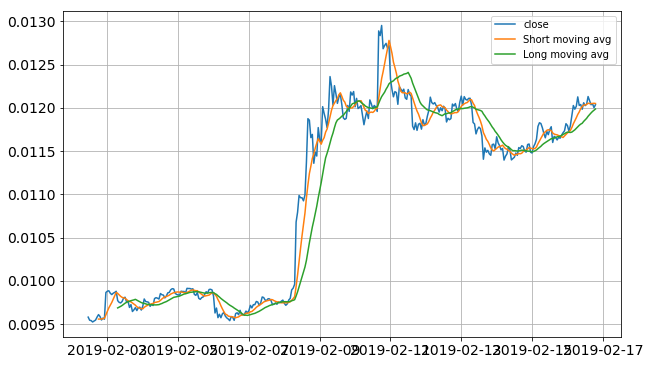

In [28]:
y1 = hourly_ohlc['LTCBTC']['close']
y2 = hourly_ohlc['LTCBTC']['close'].rolling(window=8).mean()
y3 = hourly_ohlc['LTCBTC']['close'].rolling(window=21).mean()

plt.plot(hourly_ohlc.index.values, y1, y2)
plt.plot(y3)
plt.legend(['close', 'Short moving avg', 'Long moving avg'])
plt.rcParams["figure.figsize"] = (10,6)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

# They are really moving in sync

<br>
<font size="4">Tron: the least Bitcoin-correlated coin for the period.</font><br>

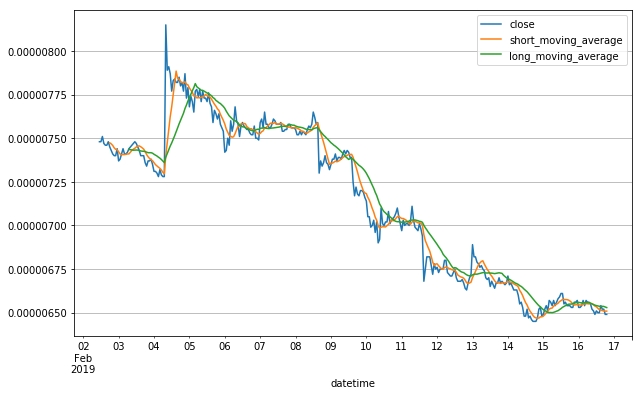

In [29]:
x = pd.DataFrame(hourly_ohlc['TRXBTC']['close'].copy())
x['short_moving_average'] = hourly_ohlc['TRXBTC']['close'].rolling(window=8).mean()
x['long_moving_average'] = hourly_ohlc['TRXBTC']['close'].rolling(window=21).mean()
x.plot(grid=True)

___
<font size="4">Ordinary Least-Squares Regression (OLS)</font><br>

In [30]:
# Performed on the two least correlated BTC pairs from above, LTC and TRX. (From hourly downsamples dataset)
# See how those correlate to each other.

# Calculate the returns 
all_returns = np.log(hourly_close / hourly_close.shift(1))

# Isolate the Bitcoin and Ethereum returns 
btc_returns = all_returns['LTCBTC']
eth_returns = all_returns['TRXBTC']

# Build a new df with the Bitcoin and Ethereum returns
return_data = pd.concat([btc_returns, eth_returns], axis=1)[1:]
return_data.columns = ['LTCBTC', 'TRXBTC']

# Add a constant 
X = sm.add_constant(return_data['LTCBTC'])

# Construct the model
model = sm.OLS(return_data['TRXBTC'],X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TRXBTC   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.098
Date:                Tue, 12 Mar 2019   Prob (F-statistic):              0.148
Time:                        14:43:27   Log-Likelihood:                 1134.4
No. Observations:                 344   AIC:                            -2265.
Df Residuals:                     342   BIC:                            -2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -0.949      0.343      -0.001       0.000
LTCBTC         0.0717      0.049      1.448      0.148      -0.026       0.169
==============================================================================
Omnibus:                      426.707   Durbin-Watson:                   2.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79639.359
Skew:                           5.295   Prob(JB):                         0.00
Kurtosis:                      76.784   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# We see they have a coeff score of only 0.0717 for the period wich is well 
# represented by the almost-horizontal line in the next cell.

# Recall that TRX had -0.75 corr with BTC and LTC had 0.95 corr with BTC and so 
# LTC/TRX is nearing 0.

# The previous price graphs show how they moved generally in opposite directions.

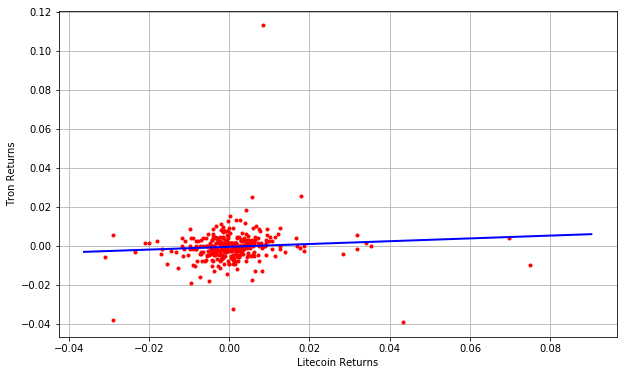

In [32]:
# Plot returns of LTCBTC and TRXBTC
plt.plot(return_data['LTCBTC'], return_data['TRXBTC'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Litecoin Returns')
plt.ylabel('Tron Returns')

# Show the plot
plt.show()

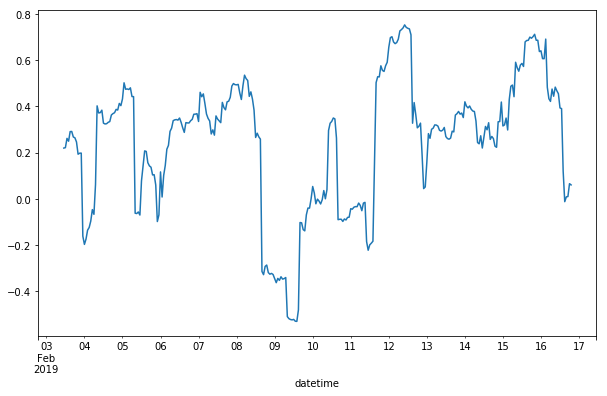

In [33]:
# Plot the rolling correlation of returns
return_data['TRXBTC'].rolling(window=24).corr(return_data['LTCBTC']).plot()
plt.show()

___
<font size="4">Volatility calculation</font><br>
As a measurement of the change in variance in the returns over a specific period of time

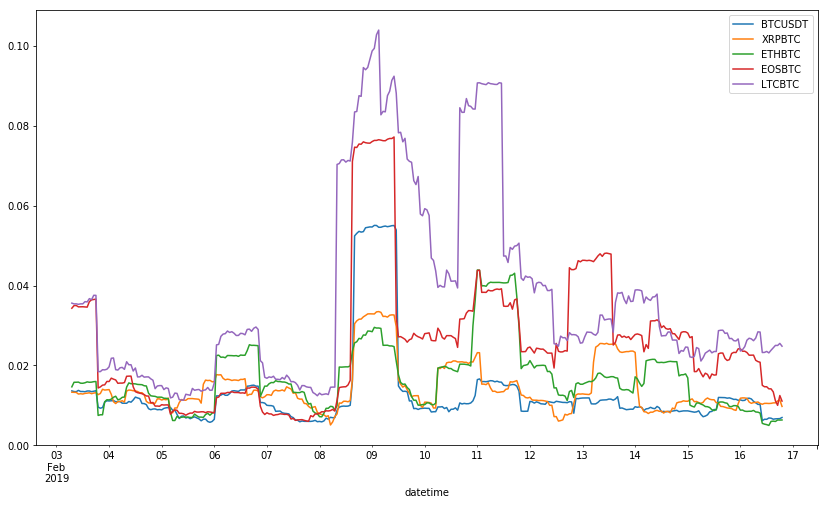

In [34]:
# Use 5 coins
sample = hourly_pct_change.iloc[:, 0:5]

# Define the minumum of periods to consider 
min_periods = 20

# Calculate the volatility
vol = sample.rolling(min_periods).std() * np.sqrt(min_periods) 

vol.plot(figsize=(14, 8))
plt.show()

Litecoin, as represented by the purple line, clearly had the most variance in its returns.

Interestingly, moreso in its second-half, more bullish period.
Notes be taken to investigate this more deeply in the future.

___
<font size="4">Notes</font><br>

We have to remember that comparing BTC pairs with BTCUSDT (the "quote" asset itself), wich is the only US Dollar pair of the dataset, is fundamentally biaised and should not be done for most analysis purposes.